Import libraries

In [128]:
from skimage.viewer import ImageViewer
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import feature
from skimage.filters import gaussian

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import random

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras.utils import to_categorical

Preprocessing filters

In [129]:
image = imread("C:/Users/emmar/Documents/GitHub/VISN/Opdracht_1/flower.jpg")

#grayscale
image_gray = rgb2gray(image)

#edge detection
canny_filter = feature.canny(image_gray, sigma=2) #TODO change sigma

#gaussian filter                    #for rgb image
gaussian_filter = gaussian(image, multichannel=True, sigma=2) #TODO change sigma

# viewer = ImageViewer(image)
# viewer.show()

# viewer = ImageViewer(image_gray)
# viewer.show()

# viewer = ImageViewer(canny_filter)
# viewer.show()

# viewer = ImageViewer(gaussian_filter)
# viewer.show()

C:\Users\emmar\AppData\Local\Temp\ipykernel_10404\2644223124.py:10: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_filter = gaussian(image, multichannel=True, sigma=2) #TODO change sigma


Loading in the dataset
Dataset used for this project from: https://www.kaggle.com/datasets/grassknoted/asl-alphabet?resource=download
Tutorial: https://www.youtube.com/watch?v=j-3vuBynnOE

In [130]:
dataset_dir = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_train/asl_alphabet_train"
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

training_data = []

for letter in letters[0]:
    #get directory of a certain letter
    path = os.path.join(dataset_dir, letter)

    #create number for each letter
    letter_num = letters.index(letter)
    print(letter)
    
    for image in os.listdir(path):
        #get one image
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) #TODO gray scale can be added here, do it??

        #compress the image to a smaller resolution
        #TODO is this needed?? > makes faster
        image_size = 50 #TODO this bigger/smaller?
        compressed_image_array = cv2.resize(image_array, (image_size, image_size))

        #add filter
        canny_filter_image = feature.canny(compressed_image_array, sigma=3)

        #add new image to the training set
        training_data.append([canny_filter_image, letter_num])

A


Formating the train and test data

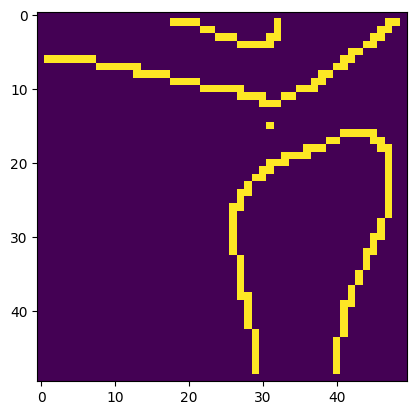

In [131]:
#randomize the images
random.shuffle(training_data)

# print(training_data[0])

plt.imshow(training_data[0][0])

train_images = []
train_labels = []

test_data_size = 100
#TODO reset this

test_images = []
test_labels = []

#separate images and labels into the testing dataset
#(the first 10.000) and the training dataset (the rest)

#TODO can this be done easier? split?
for i in range(len(training_data)):
    if i < test_data_size:
        test_images.append(training_data[i][0])
        test_labels.append(training_data[i][1])
    else:
        train_images.append(training_data[i][0])
        train_labels.append(training_data[i][1])

#reshape train and test images
train_images = np.array(train_images).reshape(-1, image_size, image_size, 1)
test_images = np.array(test_images).reshape(-1, image_size, image_size, 1)

#normalize the images
# train_images = (train_images / 255) - 0.5
# test_images = (test_images / 255) - 0.5

#normalize the images canny
train_images = train_images - 0.5
test_images = test_images - 0.5

Training and testing the CNN

In [132]:
num_filters = 3
filter_size = 3
pool_size = 2
num_epochs = 10 #TODO change these vars

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=train_images[0].shape),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(29, activation="sigmoid", name="dense")
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, to_categorical(train_labels), epochs=num_epochs, validation_data=(test_images, to_categorical(test_labels)))

test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\emmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 29) are incompatible
